<a href="https://colab.research.google.com/github/jacob7123/TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problem.

A classification is where you try to classifysomething as one thing or another.

A few types of classification problem:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [30]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

#create circles
X, y = make_circles(n_samples,
           noise=0.03,
           random_state=42)

In [31]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [32]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... Let's visualize it!

In [33]:
import pandas as pd
circles = pd.DataFrame({"X0" : X[:, 0], "X1" : X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


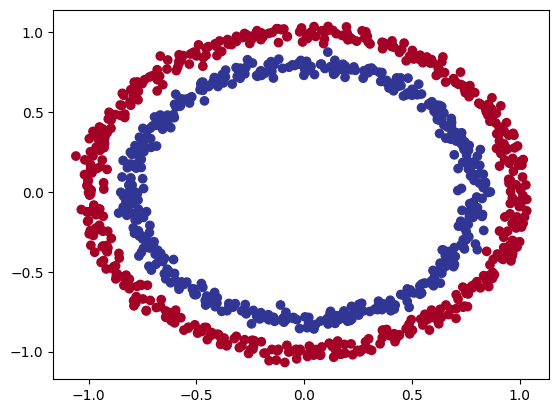

In [34]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Imput and output shapes

In [35]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [36]:
# How many samples we are working
len(X), len(y)

(1000, 1000)

In [39]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...


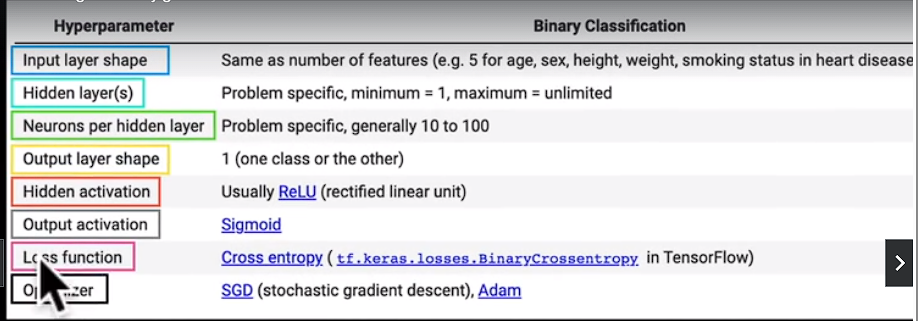

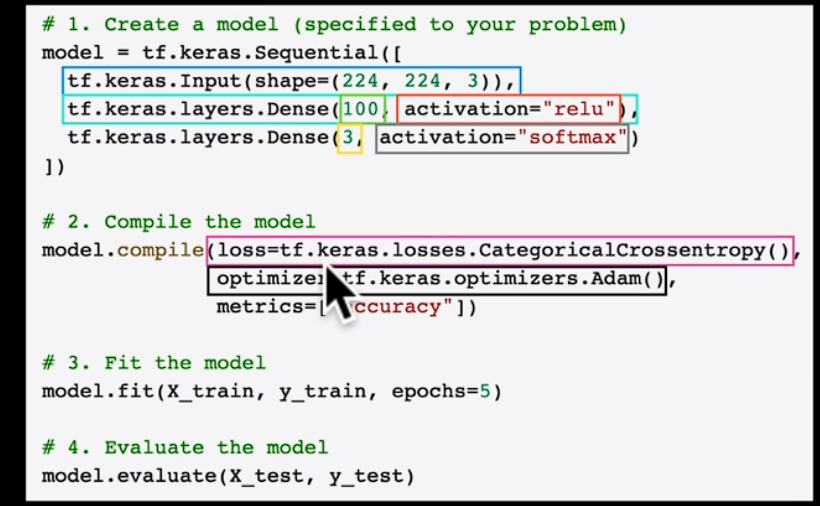

In [49]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [57]:
# Set the random_seed
tf.random.set_seed(42)

# 1. Create the model using the Sequentail API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = tf.keras.optimizers.SGD(),
        metrics = ["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 1.2679 - accuracy: 0.4790
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7204 - accuracy: 0.4980
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.4920
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4800
